Medical Appointment No Shows //
Nazim Atakan Erdogan

simple analysis and visualization was performed, some of the column names were changed, values of the factors were counted, duplicates and null values were searched but not found.



In [49]:
import pandas as pd
import numpy as npe
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [50]:
med = pd.read_csv('/content/KaggleV2-May-2016.csv.zip')
med.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [51]:
med.shape

(110527, 14)

In [52]:
med.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [53]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [54]:
med.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [55]:
med.duplicated().sum()

np.int64(0)

In [90]:
med.isna().sum()

,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0
Alcoholism,0
Handicap,0


In [56]:
med_c = med.select_dtypes(include='object')
med_c.head()

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,MATA DA PRAIA,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,PONTAL DE CAMBURI,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,No


In [57]:
med = med.rename(columns={'Handcap': 'Handicap', 'No-show': 'NoShow', 'SMS_received': 'SMSReceived'})
med.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow'],
      dtype='object')

In [58]:
med = med.drop(['PatientId', 'AppointmentID'], axis=1)

In [59]:
med_c.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'No-show'], dtype='object')

<Axes: xlabel='No-show', ylabel='count'>

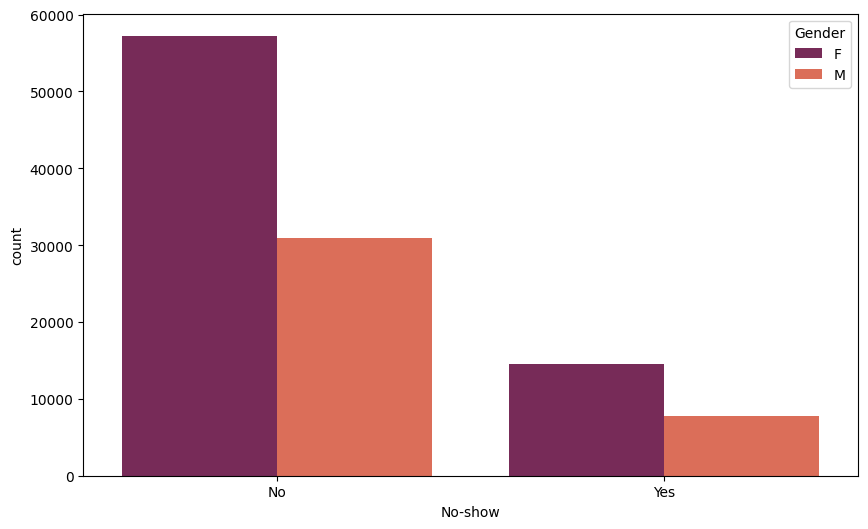

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(x='No-show', hue='Gender', data=med_c, palette='rocket')

In [61]:
med_c['Neighbourhood'].value_counts()

,count
Neighbourhood,
JARDIM CAMBURI,7717
MARIA ORTIZ,5805
RESISTÊNCIA,4431
JARDIM DA PENHA,3877
ITARARÉ,3514
...,...
ILHA DO BOI,35
ILHA DO FRADE,10
AEROPORTO,8


In [62]:
med_n = med.select_dtypes(include='number')
med_n.columns

Index(['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMSReceived'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

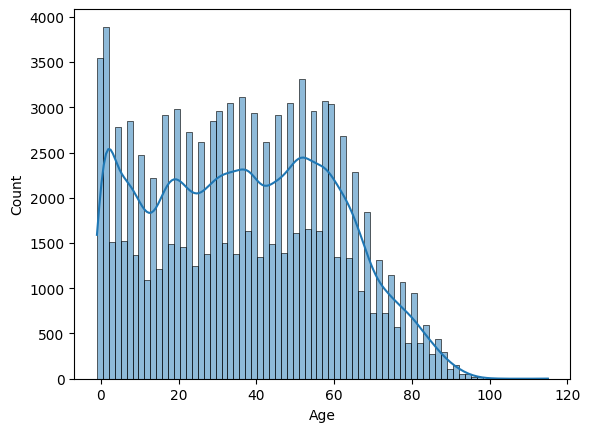

In [63]:
sns.histplot(med_n['Age'], kde=True)

<Axes: xlabel='Scholarship'>

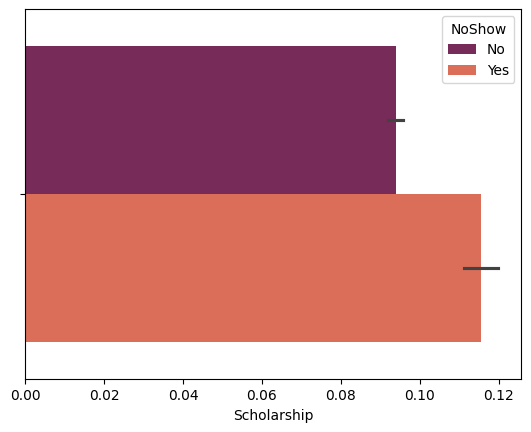

In [64]:
sns.barplot(x=med_n['Scholarship'], hue='NoShow', data=med, palette='rocket')

In [65]:
med_n1 = med_n.sample(100)

<Axes: xlabel='NoShow', ylabel='Age'>

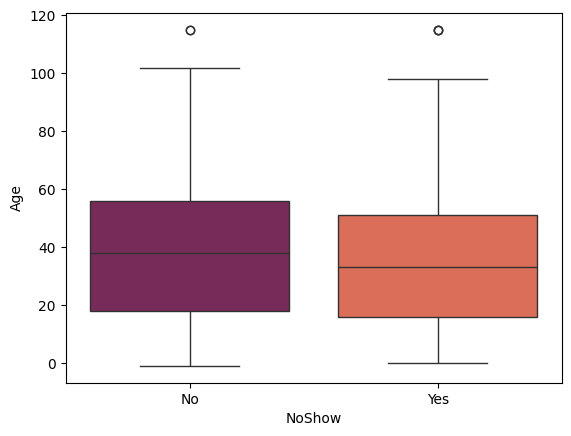

In [66]:
sns.boxplot(x='NoShow', y='Age', data=med, palette='rocket')

<Axes: xlabel='NoShow', ylabel='Age'>

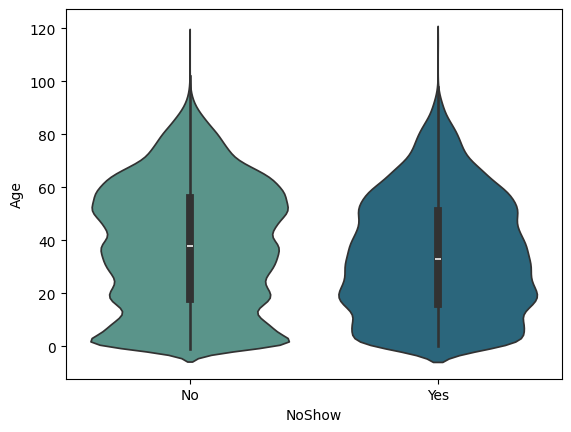

In [67]:
sns.violinplot(x='NoShow', y='Age', data=med, palette='crest')

In [68]:
corr_matrix = med_n.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSReceived
Age,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handicap,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMSReceived,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


<Axes: >

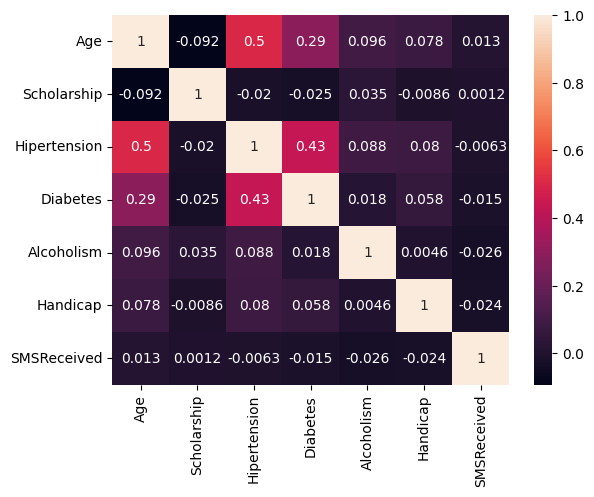

In [69]:
sns.heatmap(corr_matrix, annot=True)

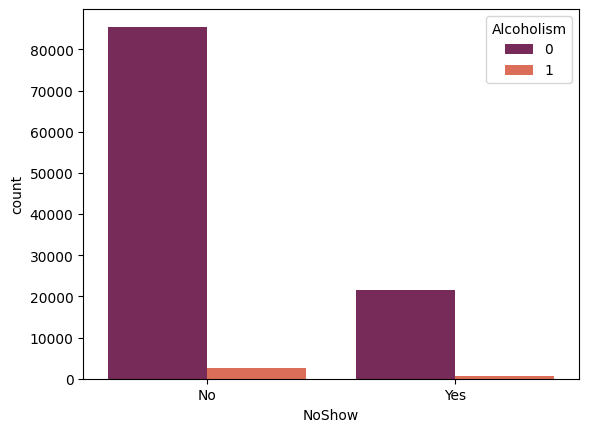

In [70]:
# alcholism vs no show

an = sns.countplot(x='NoShow', hue='Alcoholism', data=med, palette='rocket')

In [71]:
med_n['Alcoholism'].value_counts()

,count
Alcoholism,
0,107167
1,3360


In [72]:
an = med.groupby('NoShow')['Alcoholism'].value_counts()

an = pd.DataFrame(an)
an.style.background_gradient(cmap='coolwarm')

<Axes: xlabel='NoShow,Alcoholism'>

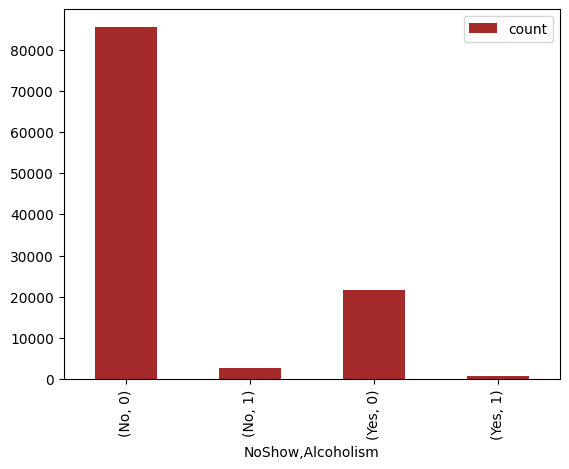

In [73]:
an.plot(kind='bar', stacked=True, color='brown')

In [74]:
med.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMSReceived', 'NoShow'],
      dtype='object')

In [75]:
med_n.columns

Index(['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMSReceived'],
      dtype='object')

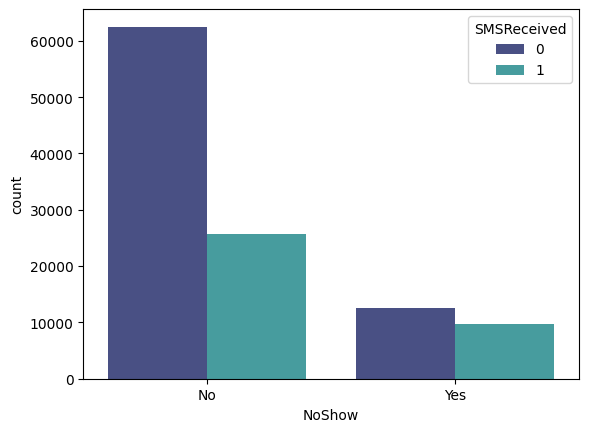

In [76]:
# sms recieved vs no show

an = sns.countplot(x='NoShow', hue='SMSReceived', data=med, palette='mako')

In [77]:
# handicap and no show

ha = med.groupby('NoShow')['Handicap'].value_counts()

ha = pd.DataFrame(ha)
ha.style.background_gradient(cmap='coolwarm')

In [78]:
# handicap and alcholism+

ha = med.groupby('Alcoholism')['Handicap'].value_counts()

ha = pd.DataFrame(ha)
ha.style.background_gradient(cmap='coolwarm')

In [79]:
med['Alcoholism'].value_counts()

,count
Alcoholism,
0,107167
1,3360


In [80]:
med.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMSReceived', 'NoShow'],
      dtype='object')

In [33]:
med['AppointmentDay'] = pd.to_datetime(med['AppointmentDay'])
med['ScheduledDay'] = pd.to_datetime(med['ScheduledDay'])

med.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [34]:
med['ScheduledDay'].value_counts()

,count
ScheduledDay,
2016-05-06 07:09:54+00:00,24
2016-05-06 07:09:53+00:00,23
2016-04-25 17:18:27+00:00,22
2016-04-25 17:17:46+00:00,22
2016-04-25 17:17:23+00:00,19
...,...
2016-05-09 10:17:48+00:00,1
2016-05-02 09:50:06+00:00,1
2016-05-13 14:28:22+00:00,1


In [35]:
med['AppointmentDay'].value_counts()

,count
AppointmentDay,
2016-06-06 00:00:00+00:00,4692
2016-05-16 00:00:00+00:00,4613
2016-05-09 00:00:00+00:00,4520
2016-05-30 00:00:00+00:00,4514
2016-06-08 00:00:00+00:00,4479
2016-05-11 00:00:00+00:00,4474
2016-06-01 00:00:00+00:00,4464
2016-06-07 00:00:00+00:00,4416
2016-05-12 00:00:00+00:00,4394


In [81]:
med_n2 = med.select_dtypes(include='number')
med_n2.columns

Index(['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMSReceived'],
      dtype='object')

In [82]:
med_c2 = med.select_dtypes(include='object')
med_c2.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'NoShow'], dtype='object')

In [83]:
med_n2.columns

Index(['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMSReceived'],
      dtype='object')

In [39]:
# hypertension vs no show up

hy = med.groupby('NoShow')['Hipertension'].value_counts()

hy = pd.DataFrame(hy)
hy.style.background_gradient(cmap='coolwarm')

In [40]:
# alcoholism vs hypertension

hy = med.groupby('Hipertension')['Alcoholism'].value_counts()

hy = pd.DataFrame(hy)
hy.style.background_gradient(cmap='coolwarm')

In [41]:
# handicap valuecount

med['Handicap'].value_counts()
# nearly 100k people are not handicapped

,count
Handicap,
0,108286
1,2042
2,183
3,13
4,3


In [42]:
med_new = med[~med['Handicap'].isin([1,2,3,4])]
med_new.value_counts()

Gender  ScheduledDay               AppointmentDay             Age  Neighbourhood   Scholarship  Hipertension  Diabetes  Alcoholism  Handicap  SMSReceived  NoShow
F       2016-04-28 11:06:57+00:00  2016-05-06 00:00:00+00:00  55   CARATOÍRA       0            1             0         0           0         0            No        7
M       2016-04-27 09:35:44+00:00  2016-06-01 00:00:00+00:00  86   ROMÃO           0            1             0         0           0         0            Yes       5
F       2016-05-02 09:20:14+00:00  2016-05-03 00:00:00+00:00  44   JARDIM CAMBURI  0            0             0         0           0         0            Yes       3
        2016-05-11 16:49:38+00:00  2016-05-16 00:00:00+00:00  61   TABUAZEIRO      0            1             1         0           0         0            Yes       3
        2016-04-15 10:54:08+00:00  2016-05-17 00:00:00+00:00  31   JARDIM CAMBURI  0            0             0         0           0         0            Yes       3
                                                                                                                                                                    ..
        2016-05-10 15:21:58+00:00  2016-05-24 00:00:00+00:00  52   DO QUADRO       0            0             0         0           0         1            No        1
        2016-05-10 15:21:57+00:00  2016-05-10 00:00:00+00:00  1    GURIGICA        0            0             0         0           0         0            No        1
        2016-05-10 15:21:29+00:00  2016-05-17 00:00:00+00:00  43   DE LOURDES      0            1             0         0           0         0            No        1
        2016-05-10 15:21:24+00:00  2016-05-17 00:00:00+00:00  16   ANDORINHAS      1            0             0         0           0         0            No        1
        2016-05-10 15:24:59+00:00  2016-05-11 00:00:00+00:00  0    CONSOLAÇÃO      0            0             0         0           0         0            No        1
Name: count, Length: 107673, dtype: int64

In [84]:
med_new.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMSReceived', 'NoShow'],
      dtype='object')

In [85]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

med_new['NoShow'] = encoder.fit_transform(med_new['NoShow'])

In [87]:
med_new_n = med_new.select_dtypes(include='number')
mew_new_n_encoded = pd.get_dummies(med_new, columns=['NoShow'], drop_first = True)

In [86]:
med_new_n = med_new.select_dtypes(include='number')
med_new_n.columns

Index(['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Handicap', 'SMSReceived', 'NoShow'],
      dtype='object')

In [46]:
# diabetes

di = med.groupby('NoShow')['Diabetes'].value_counts()

di = pd.DataFrame(di)
di.style.background_gradient(cmap='coolwarm')